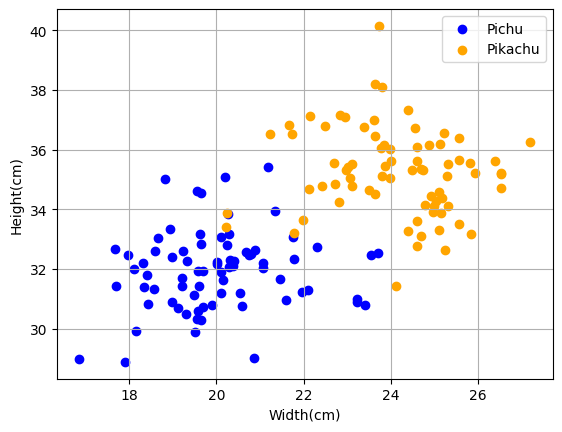

In [ ]:
import matplotlib.pyplot as plt
import math

file = "datapoints.txt"
test_points = []
pichu_x = []
pichu_y = []
pikachu_x = []
pikachu_y = []      

#I decided to turn data cleaning to a function to improve the script's readability and reusability
def clean_line(line):
    try:
        stripped = [item.strip() for item in line.split(',')]

        width = float(stripped[0])
        height = float(stripped[1])
        label = int(stripped[2])

        return width, height, label
    except (ValueError, IndexError) as e:
        print(f"Skipping line {line.strip()}. Error{e}.")
        return None

def clean_testpoints(line):

    stripped = line.strip()
    clean_line = stripped.lstrip('0123456789. ')
    no_par = clean_line.replace('(', '').replace(')','')
    try:
        coordinates = [float(item.strip()) for item in no_par.split(',')]

        return tuple (coordinates)
    
    except(ValueError,IndexError):
        return None 


def euclidean_distance(p1,p2): #This will be used for the nearest neighbour algorithm
    dist_x = p2[0] - p1[0]
    dist_y = p2[1] - p1[1]
    distance = math.sqrt(dist_x**2 + dist_y**2)
    return distance


def k_nene(pichu_x, pichu_y, pikachu_x, pikachu_y, test_point):
    dist_labels = []
    k = 11

    for i in range(len(pichu_x)):
        point = (pichu_x[i], pichu_y[i])
        distance = euclidean_distance(point,test_point)
        dist_labels.append((distance, 0))

        
    for i in range(len(pikachu_x)):
        point = (pikachu_x[i], pikachu_y[i])
        distance = euclidean_distance(point, test_point)
        dist_labels.append((distance, 1))
    
    dist_labels.sort()
    nearest = dist_labels[:k]
    
    counter = sum(neighbor[1] for neighbor in nearest)

    if counter > (k-counter):
        return 1 #prediction = Pikachu
    else: return 0 #prediction = Pichu
    

#Main Script Structure:
with open ("datapoints.txt", "r") as file:
    next(file)
    for line in file:
        cleaned_data = clean_line(line)

        if cleaned_data is not None: #Checks if the data is valid, and unpacks it 
            width,height,label = cleaned_data
        
            if label == 0:
                pichu_x.append(width)
                pichu_y.append(height)
            else:
                pikachu_x.append(width)
                pikachu_y.append(height)


print("Welcome to the Pikachu/Pichu classifier!\n Would you like to:")
print("1 - Input the test point yourself")
print("2 - Read a set of points from the file testpoints.txt")
try:
    choice = input("Enter 1 or 2: ")
except ValueError:
    print("Invalid input.")

if choice == "1":
    while True:
        try: 
            width = float(input("PLease enter the Pokemon's width in cm."))
            height = float(input("Please enter the Pokemon's height in cm."))
            test_points.append((width,height))
            break
        except ValueError: print("Please enter a valid value!")
        


elif choice == "2":
    with open ('testpoints.txt', 'r') as test:
        next(test)
        for line in test:
            point = clean_testpoints(line)
            if point != None:
                test_points.append(point)

else: print("Invalid choice, please select 1 or 2!")

       
#Now we visualize the data:
plt.scatter(pichu_x, pichu_y, color = 'blue', label = "Pichu")
plt.scatter(pikachu_x,pikachu_y, color = 'orange', label = "Pikachu")
plt.xlabel("Width(cm)")
plt.ylabel("Height(cm)")
plt.legend()
plt.grid(True)
plt.show()

for point in test_points:
    prediction = k_nene(pichu_x, pichu_y, pikachu_x, pikachu_y, point)

    if prediction == 1: prediction_label = "Pikachu"
    elif prediction == 0: prediction_label = "Pichu"
    else: prediction_label = "Error"

    print (f"The test point {point} is classified as: {prediction_label}.")
